In [2]:
## IMPORTAR LLIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px  

In [3]:
## IMPORTAR DATOS
df = pd.read_excel(r"C:\Users\fadg1\OneDrive\Escritorio\Analytics\PRUEBA TECNICA ANALSTAS DE DATOS\Datos-Tratamiento de datos y estadística descriptiva/Datos-Empleados Prueba Analista.xlsx")
df1=pd.read_excel(r"C:\Users\fadg1\OneDrive\Escritorio\Analytics\PRUEBA TECNICA ANALSTAS DE DATOS\Datos-Tratamiento de datos y estadística descriptiva/Datos-Empleados Prueba Analista.xlsx", sheet_name='Tabla Empleados') 
df2=pd.read_excel(r"C:\Users\fadg1\OneDrive\Escritorio\Analytics\PRUEBA TECNICA ANALSTAS DE DATOS\Datos-Tratamiento de datos y estadística descriptiva/Datos-Empleados Prueba Analista.xlsx", sheet_name='Tabla Evaluacion')
df3=pd.read_excel(r"C:\Users\fadg1\OneDrive\Escritorio\Analytics\PRUEBA TECNICA ANALSTAS DE DATOS\Datos-Tratamiento de datos y estadística descriptiva/Datos-Empleados Prueba Analista.xlsx", sheet_name='Tabla Sueldo')


In [4]:
## UNIR LOS DF SEGÚN CLAVE ID EMPLEADO METODO JOIN DF1 Y DF2
join = df1.join(df2.set_index('ID Empleado'), on='ID Empleado')

In [5]:
## UNIR LOS DF SEGÚN CLAVE ID EMPLEADO METODO JOIN DF2 Y DF3
join1 = join.join(df3.set_index('ID Empleado'), on='ID Empleado')

In [6]:
join1

Nombre  ID Empleado  \
0                ABAD E.,JOSE ANTONIO     43874465   
1              ABAD GOMEZ,JUAN FELIPE   1010061964   
2        ABADIA ZUÑIGA,GINA ELIZABETH   1073161578   
3      ABAUNZA GARCIA,JOHANNA MARCELA   1071868123   
4            ABAUNZA NIÑO,FLOR EMILCE     21600956   
...                               ...          ...   
39629    ZUÑIGA TELLEZ,JHON ALEXANDER     98665493   
39630  ZUQUILA MARTINEZ,WILLIAM YAMIR     98665494   
39631  ZUQUILA RODRIGUEZ,LUIS ENRIQUE     98665495   
39632            ZURITA PEREZ,DANIELA     98665496   
39633   ZURITA VARGAS,RENEE ALEJANDRO     98665497   

                              Estado Nacimiento  Género      Departamento  \
0         California, Estados Unidos 1980-09-28  Female     Admin Offices   
1         California, Estados Unidos 1983-05-10  Female     Admin Offices   
2              Texas, Estados Unidos 1975-12-16    Male     Admin Offices   
3      Massachusetts, Estados Unidos 1969-06-10    Male     Admin Offices   
4         California, Estados Unidos 1972-04-02  Female     Admin Offices   
...                              ...        ...     ...               ...   
39629          Texas, Estados Unidos 1970-09-15  Female     Admin Offices   
39630          Texas, Estados Unidos 1959-09-20  Female  Executive Office   
39631          Texas, Estados Unidos 1954-08-29  Female  Executive Office   
39632  Massachusetts, Estados Unidos 1968-05-13  Female  Executive Office   
39633          Texas, Estados Unidos 1955-11-05    Male  Executive Office   

                Posición         Nombre Jefe  Evaluación     Sueldo  
0      Administrative II        Elijiah Gray        5.91  24864.000  
1      Administrative II        Elijiah Gray        9.46  33216.000  
2                Manager      Debra Houlihan        5.70  29304.000  
3                Manager          Janet King        7.21  27264.000  
4                Manager        Elijiah Gray        5.99  24816.000  
...                  ...                 ...         ...        ...  
39629   Administrative I       David Stanley        5.36  43240.032  
39630           Director  Board of Directors        9.43  48210.000  
39631           Director  Board of Directors        5.13  38759.040  
39632           Director  Board of Directors        6.79  44514.000  
39633           Director  Board of Directors        6.36  48132.960  

[39928 rows x 10 columns]

In [9]:
## UNIR LOS DF SEGÚN CLAVE ID EMPLEADO METODO PD.MARGE DF1 Y DF2
output1 = pd.merge(df1, df2, on = ['ID Empleado'], how ='inner') 

In [10]:
## UNIR LOS DF SEGÚN CLAVE ID EMPLEADO METODO PD.MARGE output1 Y DF3
output2 = pd.merge(output1, df3, on = ['ID Empleado'], how ='inner') 

In [65]:
##ELIMINAR ESPACIOS EN BLANCO INICIALES O POSTERIORES EN DF
output2.columns = output2.columns.str.strip() 

In [88]:
from numpy import int64

## SE CONVIERTE EN STR
output2["Evaluación"] = output2["Evaluación"].apply(str).str.replace(',', '.') 
output2["Sueldo"] = output2["Sueldo"].apply(str).str.replace(',', '.') 
## CAMBIAR OBJECT A FLOAT
output2["Evaluación"] = output2["Evaluación"].astype(float, errors = "raise")
output2["Sueldo"] = output2["Sueldo"].astype(float, errors = "raise")  

In [160]:
## CAMBIAR FLOAT A INT64
output2["Evaluación"] = output2["Evaluación"].astype(int64)
output2["Sueldo"] = output2["Sueldo"].astype(int64)

In [161]:
output2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39928 entries, 0 to 39927
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Nombre        39928 non-null  object        
 1   ID Empleado   39928 non-null  int64         
 2   Estado        39928 non-null  object        
 3   Nacimiento    39928 non-null  datetime64[ns]
 4   Género        39928 non-null  object        
 5   Departamento  39928 non-null  object        
 6   Posición      39928 non-null  object        
 7   Nombre Jefe   39928 non-null  object        
 8   Evaluación    39928 non-null  int64         
 9   Sueldo        39928 non-null  int64         
 10  Estado1       39928 non-null  object        
 11  Pais          39928 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 5.0+ MB


In [162]:
## CONOCER EL SUELDO MAS ALTO
output2["Sueldo"][output2["Sueldo"].idxmax()]

3592800

In [163]:
## CONOCER EL SUELDO MAS BAJO
output2["Sueldo"][output2["Sueldo"].idxmin()]

10902

In [164]:
output2.describe()

ID Empleado    Evaluación        Sueldo
count  3.992800e+04  39928.000000  3.992800e+04
mean   2.718536e+09      7.067421  6.339518e+04
std    1.480435e+10      1.381610  1.015770e+05
min    2.210000e+02      5.000000  1.090200e+04
25%    9.864526e+07      6.000000  3.291100e+04
50%    9.865520e+07      7.000000  4.319400e+04
75%    9.866493e+07      8.000000  5.664700e+04
max    9.912281e+10      9.000000  3.592800e+06

In [165]:
print(output2.dtypes)

Nombre                  object
ID Empleado              int64
Estado                  object
Nacimiento      datetime64[ns]
Género                  object
Departamento            object
Posición                object
Nombre Jefe             object
Evaluación               int64
Sueldo                   int64
Estado1                 object
Pais                    object
dtype: object


In [95]:
print('Cantidad de Filas y columnas:',output2.shape)
print('Nombre columnas:',output2.columns)

Cantidad de Filas y columnas: (39928, 10)
Nombre columnas: Index(['Nombre', 'ID Empleado', 'Estado', 'Nacimiento', 'Género',
       'Departamento', 'Posición', 'Nombre Jefe', 'Evaluación', 'Sueldo'],
      dtype='object')


In [96]:
output2.head()

Nombre  ID Empleado                         Estado  \
0            ABAD E.,JOSE ANTONIO     43874465     California, Estados Unidos   
1          ABAD GOMEZ,JUAN FELIPE   1010061964     California, Estados Unidos   
2    ABADIA ZUÑIGA,GINA ELIZABETH   1073161578          Texas, Estados Unidos   
3  ABAUNZA GARCIA,JOHANNA MARCELA   1071868123  Massachusetts, Estados Unidos   
4        ABAUNZA NIÑO,FLOR EMILCE     21600956     California, Estados Unidos   

  Nacimiento  Género   Departamento           Posición     Nombre Jefe  \
0 1980-09-28  Female  Admin Offices  Administrative II    Elijiah Gray   
1 1983-05-10  Female  Admin Offices  Administrative II    Elijiah Gray   
2 1975-12-16    Male  Admin Offices            Manager  Debra Houlihan   
3 1969-06-10    Male  Admin Offices            Manager      Janet King   
4 1972-04-02  Female  Admin Offices            Manager    Elijiah Gray   

   Evaluación   Sueldo  
0        5.91  24864.0  
1        9.46  33216.0  
2        5.70  29304.0  
3        7.21  27264.0  
4        5.99  24816.0

In [97]:
## ELIMINAR NULOS 
output2 = output2.fillna(0) 

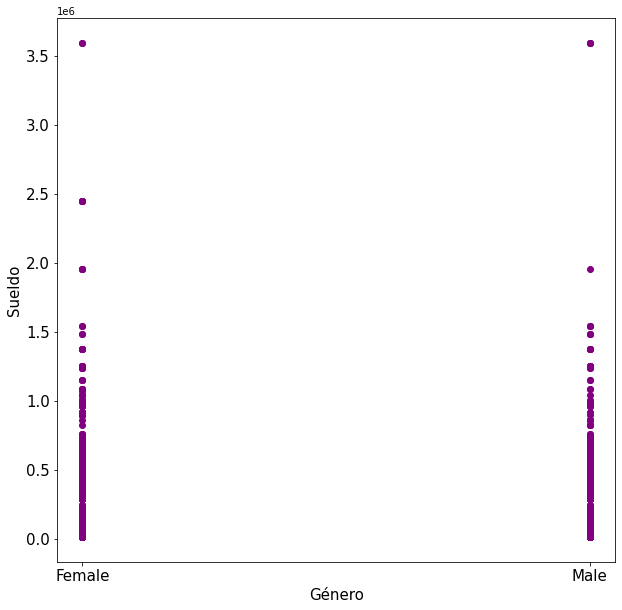

In [166]:
##GRAFICO DE BARRA ENTRE LA GENERO Y EL SUELDO
from matplotlib.pyplot import legend


x = output2["Género"].values
y = output2["Sueldo"].values
fig = plt.figure(figsize=(10,10))
plt.xlabel("Género", fontsize =15 )
plt.ylabel("Sueldo", fontsize =15 )
plt.xticks(fontsize =15 )
plt.yticks(fontsize =15 )
plt.plot(x, y, "o", color="Purple")


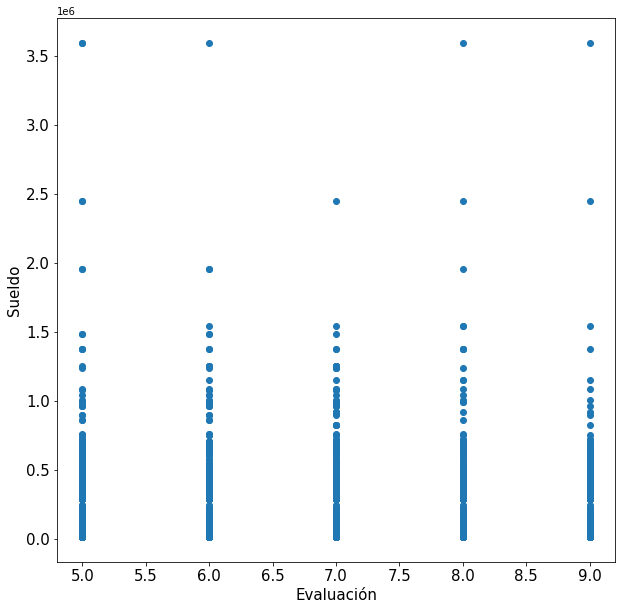

In [167]:
##GRAFICO DE DISPERSION ENTRE LA EVALUCION Y EL SUELDO
x = output2["Evaluación"]
y = output2["Sueldo"]
fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel("Evaluación", fontsize =15 )
plt.ylabel("Sueldo", fontsize =15 )
plt.xticks(fontsize =15 )
plt.yticks(fontsize =15 )
plt.show()

Text(0.5, 1.0, 'Histograma Sueldo')

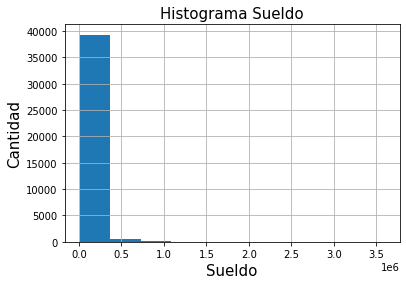

In [172]:
## HISTOGRAMA SUELDO
hist_plotsuel= output2["Sueldo"].hist(bins=10)
plt.xlabel("Sueldo", fontsize =15 )
plt.ylabel("Cantidad", fontsize =15 )
plt.title("Histograma Sueldo", fontsize =15)


Text(0.5, 1.0, 'Histograma Evaluación')

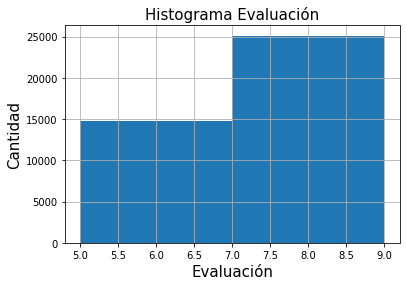

In [171]:
## HISTOGRAMA EVALUACION
hist_ploteva= output2["Evaluación"].hist(bins=2)
plt.xlabel("Evaluación", fontsize =15 )
plt.ylabel("Cantidad", fontsize =15 )
plt.title("Histograma Evaluación", fontsize =15)

In [150]:
output3 = output2.loc[:, ["Género","Evaluación","Sueldo"]] ##Seleccionar solo unas columnas
output3 
generoysueldo_profit_bar = px.bar(output3,x="Evaluación",y="Género",color="Sueldo",color_continuous_scale=["red", "yellow", "green"],
    title="<b>Genero & sueldo</b>",
)
generoysueldo_profit_bar.show()

genero_profit_scatter = px.scatter( output3, x="Sueldo", y="Género", color="Evaluación",title="<b>Genero/Sueldo</b>")
genero_profit_scatter.show()

In [16]:
output2.Estado.str.split(",",expand=True) ##separar


0                1
0         California   Estados Unidos
1         California   Estados Unidos
2              Texas   Estados Unidos
3      Massachusetts   Estados Unidos
4         California   Estados Unidos
...              ...              ...
39923          Texas   Estados Unidos
39924          Texas   Estados Unidos
39925          Texas   Estados Unidos
39926  Massachusetts   Estados Unidos
39927          Texas   Estados Unidos

[39928 rows x 2 columns]

In [104]:
Estado1 = output2.Estado.str.split(",",expand=True)[0] ##Separa datos de una columna y agregarlos al dataframe
Pais = output2.Estado.str.split(",",expand=True)[1]
output2["Estado1"] = Estado1
output2["Pais"] = Pais

In [105]:
output2.head()

Nombre  ID Empleado                         Estado  \
0            ABAD E.,JOSE ANTONIO     43874465     California, Estados Unidos   
1          ABAD GOMEZ,JUAN FELIPE   1010061964     California, Estados Unidos   
2    ABADIA ZUÑIGA,GINA ELIZABETH   1073161578          Texas, Estados Unidos   
3  ABAUNZA GARCIA,JOHANNA MARCELA   1071868123  Massachusetts, Estados Unidos   
4        ABAUNZA NIÑO,FLOR EMILCE     21600956     California, Estados Unidos   

  Nacimiento  Género   Departamento           Posición     Nombre Jefe  \
0 1980-09-28  Female  Admin Offices  Administrative II    Elijiah Gray   
1 1983-05-10  Female  Admin Offices  Administrative II    Elijiah Gray   
2 1975-12-16    Male  Admin Offices            Manager  Debra Houlihan   
3 1969-06-10    Male  Admin Offices            Manager      Janet King   
4 1972-04-02  Female  Admin Offices            Manager    Elijiah Gray   

   Evaluación   Sueldo        Estado1             Pais  
0        5.91  24864.0     California   Estados Unidos  
1        9.46  33216.0     California   Estados Unidos  
2        5.70  29304.0          Texas   Estados Unidos  
3        7.21  27264.0  Massachusetts   Estados Unidos  
4        5.99  24816.0     California   Estados Unidos

In [106]:
pd.crosstab(output2["Estado"], columns= "count").sort_values(by="count", ascending=False) ##verificar cuantas veces se repite Estado

col_0                          count
Estado                              
Texas, Estados Unidos          15831
California, Estados Unidos     10919
Massachusetts, Estados Unidos  10511
Colorado, Estados Unidos         210
Indiana, Estados Unidos          207
Montana, Estados Unidos          207
North Dakota, Estados Unidos     207
Florida, Estados Unidos          204
Idaho, Estados Unidos            204
Nevada, Estados Unidos           204
Nueva York, Estados Unidos       204
Ohio, Estados Unidos             204
Oregon, Estados Unidos           204
Pennsylvania, Estados Unidos     204
Tennessee, Estados Unidos        204
Virginia, Estados Unidos         204

In [20]:
pd.crosstab(output2["Posición"], columns= "count").sort_values(by="count", ascending=False)

col_0              count
Posición                
Engineer I          8091
Technician II       6755
Engineer II         6527
Technician I        6114
Manager             4100
Administrative I    3089
Administrative II   2788
Director            2464

In [21]:
output2.describe()

ID Empleado    Evaluación        Sueldo
count  3.992800e+04  39928.000000  3.992800e+04
mean   2.718536e+09      7.562796  6.339544e+04
std    1.480435e+10      1.375395  1.015769e+05
min    2.210000e+02      5.010000  1.090231e+04
25%    9.864526e+07      6.470000  3.291120e+04
50%    9.865520e+07      7.460000  4.319472e+04
75%    9.866493e+07      8.800000  5.664720e+04
max    9.912281e+10      9.930000  3.592800e+06

In [22]:
(output2["Sueldo"] / 1e+04).describe()

count    39928.000000
mean         6.339544
std         10.157692
min          1.090231
25%          3.291120
50%          4.319472
75%          5.664720
max        359.280000
Name: Sueldo, dtype: float64

In [48]:
output2[["Evaluación","Sueldo"]].corr()

Evaluación    Sueldo
Evaluación    1.000000 -0.016832
Sueldo       -0.016832  1.000000

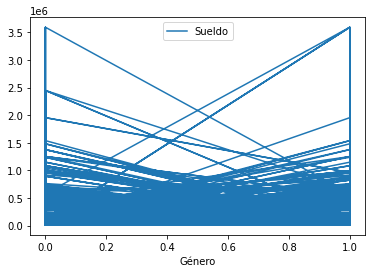

In [23]:
## CAMBIAR OBJECT INT 0 Y 1
gen_ = {"Male" :1, "Female" :0}
output3["Género"] = output3["Género"].map(gen_)
output3


In [31]:
output3[["Género","Evaluación","Sueldo"]].corr()

Género  Evaluación    Sueldo
Género      1.000000   -0.008427 -0.006132
Evaluación -0.008427    1.000000 -0.016832
Sueldo     -0.006132   -0.016832  1.000000

In [111]:
output3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39928 entries, 0 to 39927
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Género      39928 non-null  object 
 1   Evaluación  39928 non-null  float64
 2   Sueldo      39928 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.2+ MB


In [112]:
output3.Género.value_counts() ##Cantidad Hombre Male =1 mujeres Female = 0

Female    22195
Male      17733
Name: Género, dtype: int64

In [113]:
output3.Sueldo.value_counts()

24864.000     1319
43194.720     1018
41633.280      952
49959.432      838
47056.080      831
              ... 
56280.000        5
107520.000       5
68932.800        5
79104.000        5
98928.000        5
Name: Sueldo, Length: 1538, dtype: int64

In [54]:
output2genero = output2.groupby(["Género"])["Sueldo"].mean()
output2genero

Género
Female    63952.225199
Male      62698.564041
Name: Sueldo, dtype: float64

In [50]:
output2.groupby(["Género"])["Sueldo"].min()

Género
Female    10902.312
Male      10902.312
Name: Sueldo, dtype: float64

In [52]:
output2.groupby(["Género"])["Evaluación"].mean()

Género
Female    7.573156
Male      7.549829
Name: Evaluación, dtype: float64

In [58]:
output2.groupby(["Sueldo"]).filter( lambda x: len(x) > 200).Sueldo

0        24864.000
4        24816.000
5        24816.000
10       21804.624
11       24816.000
           ...    
39918    42396.000
39919    40378.800
39921    44579.280
39922    46744.560
39926    44514.000
Name: Sueldo, Length: 17559, dtype: float64

In [27]:
DFgrafica = output2.groupby(["Género","Evaluación"])["Sueldo"].sum()

In [61]:
output2.groupby(["Género","Sueldo"])["Evaluación"].mean()

Género  Sueldo     
Female  10902.312      7.355512
        10902.336      7.401579
        10908.624      6.720000
        16353.456      7.725294
        16353.480      7.580985
                         ...   
Male    1376205.480    6.390000
        1481064.000    6.386667
        1538343.168    7.233333
        1954360.800    8.910000
        3592800.000    7.693333
Name: Evaluación, Length: 3027, dtype: float64

In [64]:
output2.Sueldo >40000

0        False
1        False
2        False
3        False
4        False
         ...  
39923     True
39924     True
39925    False
39926     True
39927     True
Name: Sueldo, Length: 39928, dtype: bool

In [43]:
(output2.Sueldo >=1000000).sum() ##Sueldo mayor o igual a 70000

78

In [42]:
output2[output2.Sueldo == 1000000]

Empty DataFrame
Columns: [Nombre, ID Empleado, Estado, Nacimiento, Género, Departamento, Posición, Nombre Jefe, Evaluación, Sueldo, Estado1, Pais]
Index: []

In [44]:
output2.index[output2.Sueldo >=1000000] ##en el dataframe la ubicación mayores o iguales a 1000000

Int64Index([  180,  1676,  1796,  2476,  2478,  2663,  4730,  5070,  5708,
             5719,  6556,  6810,  7549,  7567,  7582,  7763,  9273,  9393,
            10080, 10082, 10267, 12341, 12681, 13319, 13330, 14167, 14421,
            15166, 15184, 15199, 15373, 16854, 16974, 17654, 17656, 17841,
            19935, 20275, 20906, 20917, 21754, 22008, 22761, 22779, 22794,
            22968, 24463, 24583, 25276, 25278, 25469, 27542, 27882, 28513,
            28524, 29374, 29628, 30365, 30383, 30398, 30579, 32080, 32200,
            32885, 32887, 33069, 35128, 35468, 36097, 36108, 36945, 37198,
            37936, 37954, 37969, 38142, 39626, 39745],
           dtype='int64')

In [116]:
output2[ (output2.Sueldo > 1000000) & (output2.Género   == "Male"  ) ] ## Cueldos mayores a 1000000 y sean hombres

Nombre  ID Empleado  \
180            ACEVEDO PERAFAN,JOSE RENE     15253965   
2476               ARIAS TAMAYO,JESUS A.     31582902   
4730         BOLIVAR DE M,MARIA CEFERINA     39359740   
5708        CALLEJAS RUIZ,YULIANA ANDREA     98648117   
5719               CALVO VELEZ,RICHARD A     98648123   
7549   CASTILLO VILLALOBOS,KAREN DANIELA     71399615   
10080         CUESTA GOMEZ,CARLOS ANDRES     14620409   
15166    GONZALEZ MORALES,JAVIER ANTONIO     98652844   
16854        HERNANDEZ TOBON,WILMAR DE J     98653690   
19935      MALAGON RAMIREZ,FABIAN ANDRES     98500133   
20275  MARQUEZ AGUIRRE,SEBASTIAN ELIECER     98655439   
22008              MONCADA JULIO,JORGE E   1022332552   
22968              MORALES JESUS,PEDRO L     98656825   
24463         NOVOA CASTRO,LEIDY JOHANNA     98657556   
25276         ORTIZ LOPEZ,HOLMAN OSWALDO     80656325   
25278       ORTIZ LOZANO,LEONARDO ANDRES     80549858   
28524         QUINTERO ATEHORTUA,JHORDAN     98659580   
30365          RINCON ANGULO,PAULO CESAR     98660611   
30398            RINCON D,MARIA VICTORIA     98660628   
32080               ROJAS,GIOVANI HERNAN     98661405   
32200          ROMERO COLON,RUTH JOHANNA     70731044   
32887          RUIZ VILLADA,ELIANA MARIA   1072708797   
35128                   SUAREZ M,EDGAR E     98662938   
36108                TORRES ROMERO,EDGAR  92052703109   
36945                 VALENCIA C,LILIANA     98663883   
37969           VELANDIA BLANCO,FAUSTINO     39162659   
39626      ZAPATA QUIROZ,FREDY  HUMBERTO   1035862812   
39745                  ZAPATA,RODRIGO DE     21258925   

                              Estado Nacimiento Género           Departamento  \
180            Texas, Estados Unidos 1990-09-14   Male      Production          
2476      California, Estados Unidos 1987-02-08   Male      Production          
4730      California, Estados Unidos 1968-07-26   Male          Admin Offices   
5708      California, Estados Unidos 1969-01-05   Male          Admin Offices   
5719   Massachusetts, Estados Unidos 1955-05-06   Male  Information Technlogy   
7549   Massachusetts, Estados Unidos 1972-04-17   Male      Production          
10080  Massachusetts, Estados Unidos 1982-08-18   Male      Production          
15166          Texas, Estados Unidos 1970-11-04   Male      Production          
16854  Massachusetts, Estados Unidos 1993-06-30   Male  Information Technlogy   
19935          Texas, Estados Unidos 1984-05-19   Male          Admin Offices   
20275  Massachusetts, Estados Unidos 1974-02-23   Male                  Sales   
22008     California, Estados Unidos 1994-10-17   Male      Production          
22968          Texas, Estados Unidos 1972-04-17   Male      Production          
24463          Texas, Estados Unidos 1974-03-30   Male  Information Technlogy   
25276     California, Estados Unidos 1973-09-13   Male       Executive Office   
25278     California, Estados Unidos 1965-09-06   Male  Information Technlogy   
28524          Texas, Estados Unidos 1991-09-11   Male      Production          
30365          Texas, Estados Unidos 1959-12-09   Male                  Sales   
30398          Texas, Estados Unidos 1982-08-08   Male   Software Engineering   
32080           Ohio, Estados Unidos 1968-09-06   Male      Production          
32200          Texas, Estados Unidos 1982-08-08   Male   Software Engineering   
32887     California, Estados Unidos 1986-10-07   Male      Production          
35128  Massachusetts, Estados Unidos 1988-06-03   Male   Software Engineering   
36108          Texas, Estados Unidos 1980-07-05   Male                  Sales   
36945     California, Estados Unidos 1977-03-06   Male          Admin Offices   
37969          Texas, Estados Unidos 1969-07-29   Male  Information Technlogy   
39626          Texas, Estados Unidos 1970-09-08   Male      Production          
39745          Texas, Estados Unidos 1969-07-29   Male  Information Technlogy   

                Posición      

In [115]:
output2.Sueldo.max() ## el mayor sueldo

3592800.0

In [117]:
output2[output2.Sueldo == output2.Sueldo.max()] ## seleccionar sueldos mas altos

Nombre  ID Empleado  \
4730     BOLIVAR DE M,MARIA CEFERINA     39359740   
12341    FRANCO JARAMILLO,JUAN DIEGO   1073155840   
19935  MALAGON RAMIREZ,FABIAN ANDRES     98500133   
27542               PINEDA A,ANTONIO     98659131   
35128               SUAREZ M,EDGAR E     98662938   

                              Estado Nacimiento  Género          Departamento  \
4730      California, Estados Unidos 1968-07-26    Male         Admin Offices   
12341          Texas, Estados Unidos 1990-11-23  Female         Admin Offices   
19935          Texas, Estados Unidos 1984-05-19    Male         Admin Offices   
27542          Texas, Estados Unidos 1991-07-19  Female     Production          
35128  Massachusetts, Estados Unidos 1988-06-03    Male  Software Engineering   

                Posición         Nombre Jefe  Evaluación     Sueldo  \
4730    Administrative I  Brandon R. LeBlanc        8.80  3592800.0   
12341  Administrative II  Brandon R. LeBlanc        5.10  3592800.0   
19935  Administrative II       David Stanley        9.00  3592800.0   
27542       Technician I            Amy Dunn        6.70  3592800.0   
35128        Engineer II     Alex Sweetwater        5.28  3592800.0   

             Estado1             Pais  
4730      California   Estados Unidos  
12341          Texas   Estados Unidos  
19935          Texas   Estados Unidos  
27542          Texas   Estados Unidos  
35128  Massachusetts   Estados Unidos